In [6]:
import numpy as np
import matplotlib.pyplot as plt
import random

In [5]:
def SingleLaunch(py0,radius, density, theta, vel):
    mass = 4.0/3.0*np.pi*radius**3*density #kg
    Const = 0.6
    densityAir = 1.2 #kg/m3
    Area = np.pi*radius**2 #m2
    gx=0.0; gy=-10.0 #m/s2

    tmax = 90.0; tmin = 0.0
    intervals = 100; dt = (tmax-tmin) / intervals
    nt = intervals + 1; time = np.arange(nt) * dt
    aGx = np.ones(nt-2) * gx; aGy = np.ones(nt-2) * gy
    aDx = np.zeros(nt-2); aDy = np.zeros(nt-2)
    vx = np.zeros(nt-1); vy = np.zeros(nt-1)
    vx[0]=vel*np.cos(theta); vy[0]=vel*np.sin(theta)

    for it in np.arange(nt-2):
        vMag2=vx[it]**2+vy[it]**2
        accDrag=0.5*Const*densityAir*Area*vMag2/mass
        if accDrag>0.:
            aDx[it]=-accDrag*vx[it]/vMag2**0.5 #time t+1/2
            aDy[it]=-accDrag*vy[it]/vMag2**0.5 
        else:
            aDx[it]=0
            aDy[it]=0
        vx[it+1] = vx[it]+(aGx[it]+aDx[it])*dt #time t+1/2
        vy[it+1] = vy[it]+(aGy[it]+aDy[it])*dt 

    # calculate position
    pxInc = 0.5*(vx[:-1]+vx[1:])*dt 
    pyInc = 0.5*(vy[:-1]+vy[1:])*dt
    px=np.append(([0.]),pxInc.cumsum()) #initiate from 0.
    py=np.append(([py0]),py0+pyInc.cumsum()) 

    return(px,py)

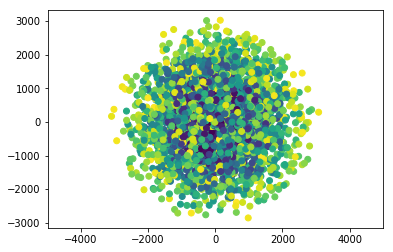

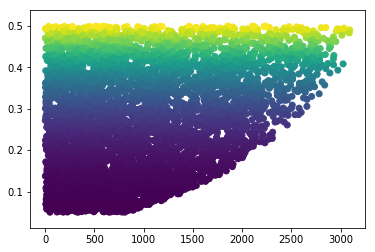

In [7]:
launches = 5000
landing = np.zeros(launches)
radii = np.zeros(launches)
mass = np.zeros(launches)
for thisTrajectory in np.arange(launches):
    radius=random.uniform(0.05, 0.5)
    density=2500.
    theta=random.uniform(0.,np.pi/2)
    vel=random.uniform(10.,200.)
    py0 = 1300.
    (px,py)=SingleLaunch(py0,radius, density, theta, vel)
    #plt.plot(px,py,label=str(thisTrajectory))
    landing[thisTrajectory]=px[py<0][0]
    radii[thisTrajectory]=radius
    mass[thisTrajectory]=4.0/3.0*np.pi*radius**3*density

phi=np.random.random(launches)*2*np.pi
plt.scatter(np.cos(phi)*landing,np.sin(phi)*landing,c=radii)
plt.axis('equal')
plt.savefig('MonteCarloVolcanoAround.pdf')
plt.show()

plt.scatter(landing,radii,c=mass)
plt.savefig('MonteCarloVolcanoLandingvsSize.pdf')
plt.show()